In [1]:
import pandas as pd
import numpy as np
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Read Twitter API

In [2]:
log = pd.read_csv("api keys.csv")

In [3]:
consumerKey = log["key"][0]
consumerSecret = log["key"][1]
accessToken = log["key"][2]
accessTokenSecret = log["key"][3]

### Authenticate API keys


In [4]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit = True) # api object

### Get a Tweet from Twitter

In [5]:
post = api.user_timeline(screen_name="elonmusk", count = 100, lang ="en", tweet_mode="extended")

####  Print the last 5 tweets

In [6]:
i=1
for tweet in post[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

1) @thesheetztweetz @SpaceX @USCG @PortCanaveral Glad we could help

2) @JoshManuel It’s true

3) @Erdayastronaut @thirdrowtesla @mayemusk Coming soon

4) @thirdrowtesla @Erdayastronaut @mayemusk Yes, this is a high priority

5) @Johnnaaaaaaaaaa @Kristennetten @thirdrowtesla @mayemusk Operating on a prime directive of crash avoidance, it could automatically intervene when crash probability is approaching 100%



### Save Tweets in DataFrame

In [7]:
twitter = pd.DataFrame([tweet.full_text for tweet in post], columns=['Tweets'])

### Clean a Tweet

In [8]:
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

In [9]:
twitter['Tweets'] = twitter['Tweets'].apply(cleanTxt)

In [10]:
twitter.head()

,Tweets
0,Glad we could help
1,It’s true
2,Coming soon
3,"Yes, this is a high priority"
4,Operating on a prime directive of crash av...


## Apply a Tweet for get subjectivity and polarity

In [11]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [12]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [13]:
twitter['Subjectivity'] = twitter['Tweets'].apply(getSubjectivity)
twitter['Polarity'] = twitter['Tweets'].apply(getPolarity)

In [14]:
twitter

,Tweets,Subjectivity,Polarity
0,Glad we could help,1.00,0.5000
1,It’s true,0.65,0.3500
2,Coming soon,0.00,0.0000
3,"Yes, this is a high priority",0.54,0.1600
4,Operating on a prime directive of crash av...,0.00,0.0000
...,...,...,...
95,13031925 _ Good chance it accelerates viral v...,0.60,0.7000
96,13031925 _ True 🤣🤣,0.65,0.3500
97,What’s troubling is that this doesn’t get hu...,0.70,-0.5250
98,"_ Excuse me, that’s Mr. Bizznizz 🧲. Where’s t...",0.05,-0.0625


### find a common word of tweets and analysis using ploting

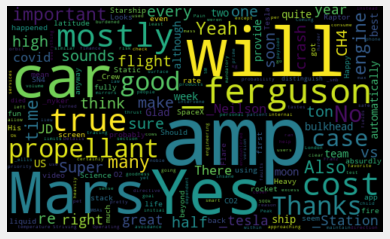

In [15]:
allWords = ' '.join([twts for twts in twitter['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Apply a Sentiment in word and save in datafame

In [16]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [17]:
twitter['Analysis'] = twitter['Polarity'].apply(getAnalysis)

In [18]:
twitter

,Tweets,Subjectivity,Polarity,Analysis
0,Glad we could help,1.00,0.5000,Positive
1,It’s true,0.65,0.3500,Positive
2,Coming soon,0.00,0.0000,Neutral
3,"Yes, this is a high priority",0.54,0.1600,Positive
4,Operating on a prime directive of crash av...,0.00,0.0000,Neutral
...,...,...,...,...
95,13031925 _ Good chance it accelerates viral v...,0.60,0.7000,Positive
96,13031925 _ True 🤣🤣,0.65,0.3500,Positive
97,What’s troubling is that this doesn’t get hu...,0.70,-0.5250,Negative
98,"_ Excuse me, that’s Mr. Bizznizz 🧲. Where’s t...",0.05,-0.0625,Negative


In [19]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweets        100 non-null    object 
 1   Subjectivity  100 non-null    float64
 2   Polarity      100 non-null    float64
 3   Analysis      100 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.2+ KB


### Get positive tweets

In [20]:
positive = twitter.loc[twitter['Analysis'].str.contains('Positive')]
positive.drop(['Subjectivity','Polarity'], axis=1, inplace=True)

c:\users\yogesh\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
positive.head()

,Tweets,Analysis
0,Glad we could help,Positive
1,It’s true,Positive
3,"Yes, this is a high priority",Positive
5,"Pain can certainly be turned off, but we’re ...",Positive
6,Teslas automatically maintain their interna...,Positive


In [22]:
positive.shape

(50, 2)

### Get negative Tweets

In [23]:
negative = twitter.loc[twitter['Analysis'].str.contains('Negative')]
negative.drop(['Subjectivity','Polarity'], axis=1, inplace=True)

c:\users\yogesh\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
negative.head()

,Tweets,Analysis
7,That’s harder than it sounds. Will check wi...,Negative
18,A mandatory tracing app would be insane,Negative
24,Peak rate of about half that for version 1 is...,Negative
29,11 A fully &amp; rapidly reusable orbital r...,Negative
30,SLS makes me feel sad,Negative


In [25]:
negative.shape

(19, 2)

### Get Neutral Tweets

In [26]:
neutral = twitter.loc[twitter['Analysis'].str.contains('Neutral')]
neutral.drop(['Subjectivity','Polarity'], axis=1, inplace=True)

c:\users\yogesh\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
neutral.head()

,Tweets,Analysis
2,Coming soon,Neutral
4,Operating on a prime directive of crash av...,Neutral
9,!,Neutral
14,11 Would be about 10 times that cost for pa...,Neutral
16,🤣🤣,Neutral


In [28]:
neutral.shape

(31, 2)

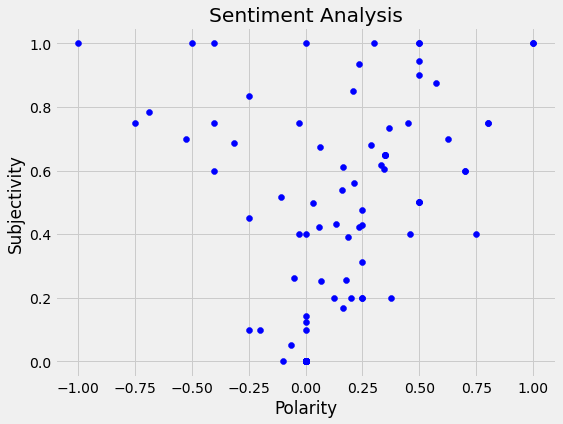

In [29]:
plt.figure(figsize=(8,6))
for i in range(0, twitter.shape[0]):
    plt.scatter(twitter["Polarity"][i], twitter["Subjectivity"][i], color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

### Persentage of positive, ngative and neutral tweets

In [30]:
print(str(round((positive.shape[0]/twitter.shape[0])*100, 1))+' %')

50.0 %


In [31]:
print(str(round((negative.shape[0]/twitter.shape[0])*100, 1))+' %')

19.0 %


In [32]:
twitter['Analysis'].value_counts()

Positive    50
Neutral     31
Negative    19
Name: Analysis, dtype: int64

### Plotting and visualizing tweets

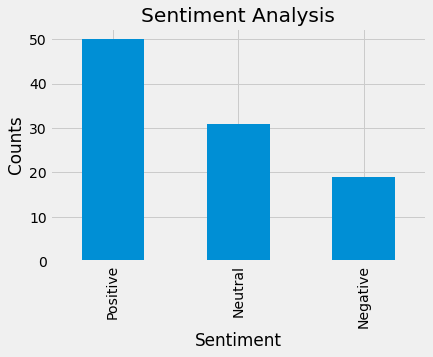

In [33]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
twitter['Analysis'].value_counts().plot(kind = 'bar')
plt.show()
